In [ ]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Load the training and validation datasets
data = pd.read_csv('twitter_training.csv')

# Display the first few rows of the dataset
print(data.head())

   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     


In [ ]:
col_names = ['ID', 'Entity', 'Sentiment', 'Content']
df = pd.read_csv('twitter_training.csv', names=col_names)

In [ ]:
df.head()

,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
df.shape

(60955, 4)

In [ ]:
df.describe

<bound method NDFrame.describe of          ID               Entity   Sentiment  \
0      2401          Borderlands    Positive   
1      2401          Borderlands    Positive   
2      2401          Borderlands    Positive   
3      2401          Borderlands    Positive   
4      2401          Borderlands    Positive   
...     ...                  ...         ...   
60950  4847  GrandTheftAuto(GTA)  Irrelevant   
60951  4847  GrandTheftAuto(GTA)  Irrelevant   
60952  4847  GrandTheftAuto(GTA)  Irrelevant   
60953  4847  GrandTheftAuto(GTA)  Irrelevant   
60954  4848  GrandTheftAuto(GTA)  Irrelevant   

                                                 Content  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
60950  Whoever vandalizing the speed cameras around t...  
60951  Whoever is vandalizing the speed cameras aroun...  
60952  OH Whoever is vandalizing the video speed came...  
60953  Whoever is mounting the speed cameras around f...  
60954  The first one looks like the shit you see in h...  

[60955 rows x 4 columns]>

In [ ]:
df.isnull().sum()

ID             0
Entity         0
Sentiment      0
Content      554
dtype: int64

In [ ]:
df.dropna(axis=0 , inplace=True)

In [ ]:
df.isnull().sum()

ID           0
Entity       0
Sentiment    0
Content      0
dtype: int64

In [ ]:
df.duplicated().sum()

1945

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts

Negative      16967
Positive      16302
Neutral       14156
Irrelevant    11031
Name: Sentiment, dtype: int64

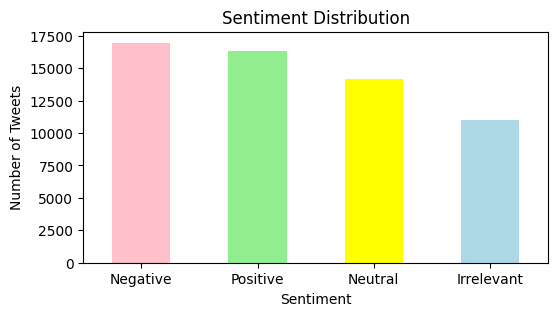

In [ ]:
plt.figure(figsize=(6, 3))
sentiment_counts.plot(kind='bar', color=['pink', 'lightgreen', 'yellow', 'lightblue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

In [ ]:
brand_data = df[df['Entity'].str.contains('Microsoft', case=False)]
brand_sentiment_counts = brand_data['Sentiment'].value_counts()
brand_sentiment_counts

Neutral       816
Negative      748
Positive      573
Irrelevant    167
Name: Sentiment, dtype: int64

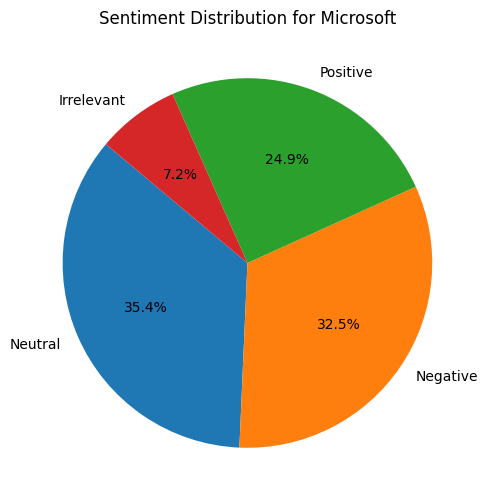

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(brand_sentiment_counts, labels=brand_sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution for Microsoft')
plt.show()